<a href="https://colab.research.google.com/github/vijivenkadesh/computer_vision/blob/main/image_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import TensorFlow and DataSets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

!pip install mlflow --quiet
!pip install pyngrok --quiet

import mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 8.3 MB/s eta 0:00:00


In [ ]:
'mnist' in tfds.list_builders()

True

In [ ]:
data, metadata = tfds.load(name='mnist',
                           as_supervised=True,
                           with_info=True,
                           shuffle_files=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Splitting the data

In [ ]:
test_data = data['test']
train_data = data['train']

Getting the class names

In [ ]:
class_names = metadata.features['label'].names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Printing an Image

In [ ]:
train_data = train_data.shuffle(buffer_size=1000)
sample = train_data.take(1)

Text(0.5, 1.0, '7')

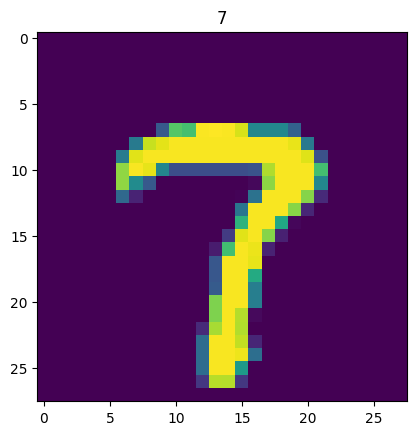

In [ ]:
for image, label in sample:
  sample_image = image
  sample_label = label

import matplotlib.pyplot as plt
plt.imshow(sample_image)
plt.title(sample_label.numpy())

Preprocessing function the image

In [ ]:
def preprocessing_image(image, label, imagesize=28):
  image = tf.image.resize(images=image,
                          size=[imagesize, imagesize],
                          )
  return tf.cast(image, dtype=tf.float32)/255., label

Creating an input pipeline

In [ ]:
train_data = train_data.map(map_func=preprocessing_image, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000)
train_data = train_data.batch(batch_size=32)
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#Same pipeline with a single line of code, compaing all the methods in one line

test_data = test_data.map(map_func=preprocessing_image, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Creating the model

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, GlobalAveragePooling1D, Dense, Flatten

In [ ]:
model = Sequential([
        Convolution2D(filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(28, 28, 1)), # input layer (specify input shape)
  Convolution2D(10, 3, activation='relu'),
  Convolution2D(10, 3, activation='relu'),
  Flatten(),
  Dense(10, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 10)        910       
                                                                 
 flatten (Flatten)           (None, 4840)              0         
                                                                 
 dense (Dense)               (None, 10)                48410     
                                                                 
Total params: 50330 (196.60 KB)
Trainable params: 50330 (196.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
experiment_id = mlflow.create_experiment(name='classification_mnist_tensorflow')
mlflow.set_experiment(experiment_name=experiment_id)

2024/03/10 01:43:23 INFO mlflow.tracking.fluent: Experiment with name '464897285176941975' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/909703655930022304', creation_time=1710035003496, experiment_id='909703655930022304', last_update_time=1710035003496, lifecycle_stage='active', name='464897285176941975', tags={}>

In [ ]:
mlflow.start_run(run_name='testing_autolog_function', nested=True)
mlflow.tensorflow.autolog()
history1 = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.15 * len(test_data)))

mlflow.end_run()

2024/03/10 01:43:34 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 
2024/03/10 01:43:36 INFO mlflow.types.utils: MLflow 2.9.0 introduces model signature with new data types for lists and dictionaries. For input such as Dict[str, Union[scalars, List, Dict]], we infer dictionary values types as `List -> Array` and `Dict -> Object`. 


Epoch 1/5
   6/1875 [..............................] - ETA: 47s - loss: 2.2287 - accuracy: 0.2083

1875/1875 [==============================] - 21s 8ms/step - loss: 0.1775 - accuracy: 0.9465 - val_loss: 0.0632 - val_accuracy: 0.9803
Epoch 2/5
  20/1875 [..............................] - ETA: 10s - loss: 0.0813 - accuracy: 0.9719

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0656 - accuracy: 0.9809 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0432 - val_accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0480 - val_accuracy: 0.9885
Epoch 5/5
1/1 [==============================] - 0s 314ms/step


2024/03/10 01:45:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


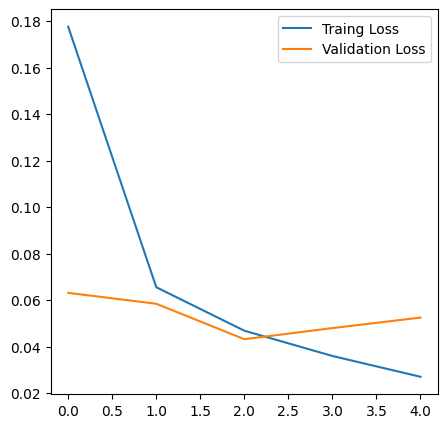

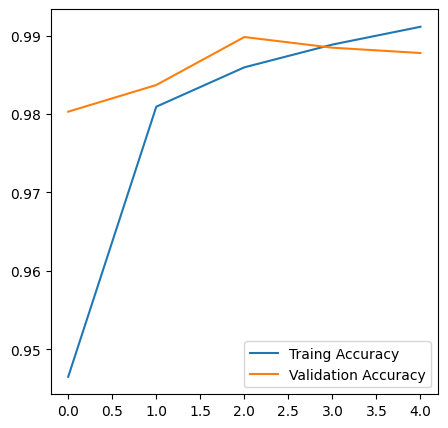

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(history1.history['loss'], label='Traing Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()

plt.figure(figsize=(5, 5))
plt.plot(history1.history['accuracy'], label='Traing Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()


In [ ]:
def load_and_prep_image(filename, img_shape=28):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=1)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
loaded_img = load_and_prep_image('three.jpg')

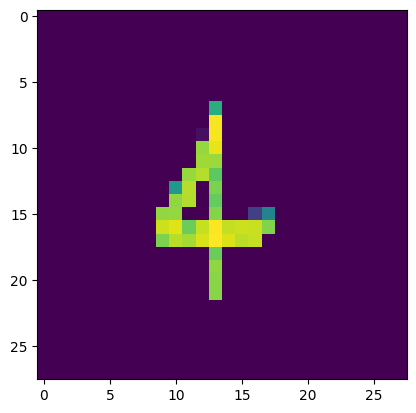

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(loaded_img)

In [ ]:
loaded_img = tf.expand_dims(loaded_img, axis=0)
loaded_img.shape

TensorShape([1, 28, 28, 1])

In [ ]:
predict_1 = model.predict(loaded_img)
predict_1

1/1 [==============================] - 0s 168ms/step


array([[1.5023068e-04, 5.2855466e-05, 1.4599632e-03, 4.1725349e-02,
        4.2284420e-01, 4.6153018e-01, 1.4027157e-01, 6.0401249e-05,
        1.5941634e-03, 5.0744873e-02]], dtype=float32)

In [ ]:
predict_1.argmax()

5

In [ ]:
class_names[predict_1.argmax()]

'5'

In [ ]:
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2dQidHTAz61GXyOsDd8ZqhTfh22_ALAmt1k3CsB9dMFYYKgT"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://b36f-34-118-240-137.ngrok-free.app


In [ ]:
print(mlflow.get_tracking_uri())

file:///content/mlruns


In [ ]:
!mlflow ui

[2024-03-10 01:53:41 +0000] [4897] [INFO] Starting gunicorn 21.2.0
[2024-03-10 01:53:41 +0000] [4897] [INFO] Listening at: http://127.0.0.1:5000 (4897)
[2024-03-10 01:53:41 +0000] [4897] [INFO] Using worker: sync
[2024-03-10 01:53:41 +0000] [4898] [INFO] Booting worker with pid: 4898
[2024-03-10 01:53:41 +0000] [4903] [INFO] Booting worker with pid: 4903
[2024-03-10 01:53:41 +0000] [4904] [INFO] Booting worker with pid: 4904
[2024-03-10 01:53:41 +0000] [4905] [INFO] Booting worker with pid: 4905
[2024-03-10 02:04:31 +0000] [4897] [INFO] Handling signal: int
[2024-03-10 02:04:31 +0000] [4898] [INFO] Worker exiting (pid: 4898)
[2024-03-10 02:04:31 +0000] [4904] [INFO] Worker exiting (pid: 4904)
[2024-03-10 02:04:31 +0000] [4905] [INFO] Worker exiting (pid: 4905)
[2024-03-10 02:04:31 +0000] [4903] [INFO] Worker exiting (pid: 4903)

Aborted!
[2024-03-10 02:04:31 +0000] [4897] [INFO] Shutting down: Master
